In [ ]:
# en este vamos a añadirle los regresores para ver qué ocurre

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from prophet import Prophet

In [2]:
df = pd.read_csv('../data/Bike_Sharing_Demand.csv',parse_dates = True)

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [7]:
df = df.rename(columns={'datetime': 'ds', 'count': 'y'})

In [8]:
validate = df[['ds','y','season','holiday','weather','temp','humidity','windspeed']].tail(48)

In [9]:
df.drop(df[['ds','y','season','holiday','weather','temp','humidity','windspeed']].tail(48).index,inplace=True)

In [10]:
train = df[['ds','y','season','holiday','weather','temp','humidity','windspeed']]

In [11]:
m = Prophet( yearly_seasonality=True)
# añade como regresor todas las variables menos working_day (sin más)
# parece que son variables importantes
m.add_regressor('season')
m.add_regressor('holiday')
m.add_regressor('weather')
m.add_regressor('temp')
m.add_regressor('humidity')
m.add_regressor('windspeed')

In [12]:
m.fit(train)

Initial log joint probability = -328.075
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      71       18482.1   0.000118446       160.399   9.443e-07       0.001      119  LS failed, Hessian reset 
      99       18482.5    5.8515e-05       76.5343      0.7063      0.7063      153   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       18482.7   0.000377461       86.5554           1           1      269   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       18482.8   6.55584e-05       96.8344   4.107e-07       0.001      330  LS failed, Hessian reset 
     250       18482.8   1.03572e-06       67.5074      0.2323      0.8496      381   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [13]:
p = 48
future = m.make_future_dataframe(periods=p,freq='H',include_history=False)

In [14]:
future['season'] = validate['season'].values 
future['holiday'] = validate['holiday'].values 
future['weather'] =  validate['weather'].values
future['temp'] = validate['temp'].values 
future['humidity'] =  validate['humidity'].values
future['windspeed'] = validate['windspeed'].values 

In [15]:
forecast = m.predict(future)

In [16]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-12-18 00:00:00,277.781832,-40.056145,225.138671,277.781832,277.781832,-186.519420,-186.519420,-186.519420,-101.177010,...,2.206972,2.206972,2.206972,-3.574754,-3.574754,-3.574754,0.0,0.0,0.0,91.262413
1,2012-12-18 01:00:00,277.792034,-64.735683,206.535845,277.792034,277.792034,-201.522307,-201.522307,-201.522307,-116.617800,...,2.206972,2.206972,2.206972,-3.728023,-3.728023,-3.728023,0.0,0.0,0.0,76.269727
2,2012-12-18 02:00:00,277.802236,-96.668779,179.492326,277.802236,277.802236,-241.103337,-241.103337,-241.103337,-157.946749,...,-1.281580,-1.281580,-1.281580,-3.881579,-3.881579,-3.881579,0.0,0.0,0.0,36.698899
3,2012-12-18 03:00:00,277.812437,-117.115927,168.205052,277.812437,277.812437,-257.325205,-257.325205,-257.325205,-196.513195,...,-0.117432,-0.117432,-0.117432,-4.035419,-4.035419,-4.035419,0.0,0.0,0.0,20.487233
4,2012-12-18 04:00:00,277.822639,-111.562940,159.364775,277.822639,277.822639,-246.821411,-246.821411,-246.821411,-192.302512,...,1.042823,1.042823,1.042823,-4.189540,-4.189540,-4.189540,0.0,0.0,0.0,31.001228


In [17]:
timeseries_evaluation_metrics_func(validate.y,forecast.yhat)

MSE is : 10527.567183099207
MAE is : 66.72531511029955
RMSE is : 102.60393356543017
MAPE is : 115.03088248758797
R2 is : 0.6822274218975918



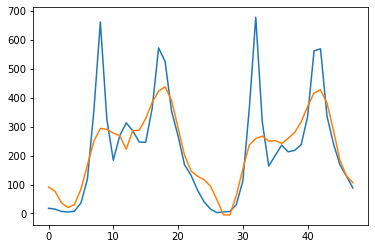

In [18]:
plt.plot(list(validate.y))
plt.plot(list(forecast.yhat))
# una vez más la predicción es peor por el valor de r^2

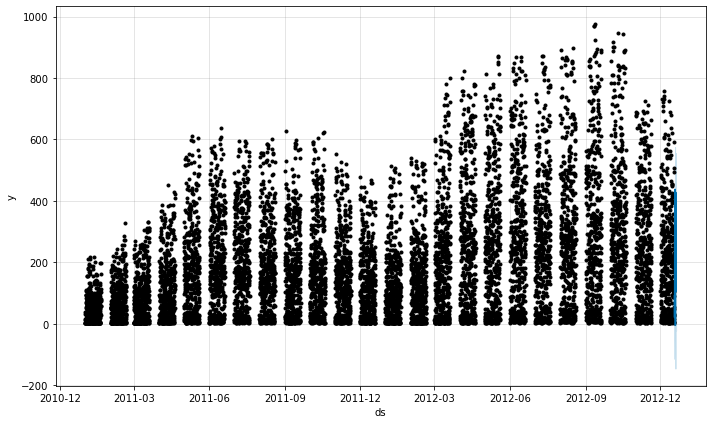

In [19]:
fig1 = m.plot(forecast)

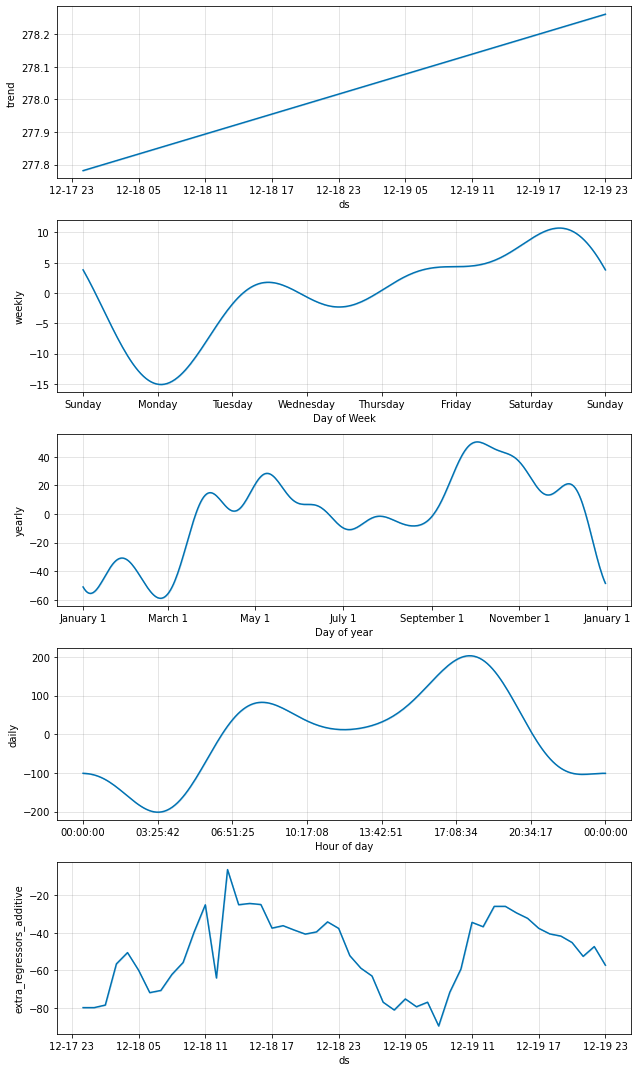

In [20]:
fig2 = m.plot_components(forecast)

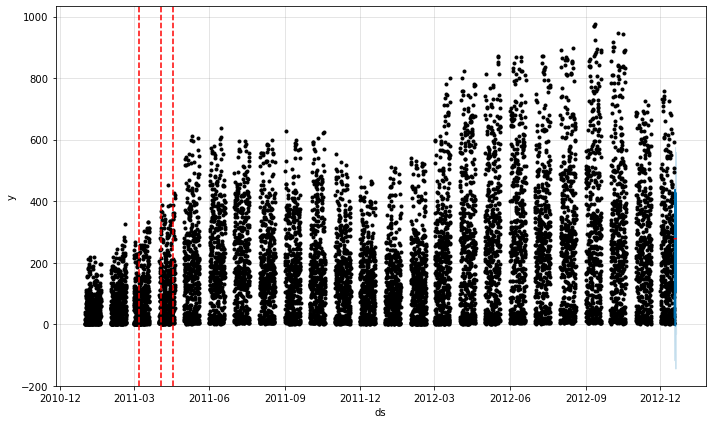

In [19]:
# cambios en la tendencia
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
# la predicción es muy complicada porque lo estamos haciendo hora a hora. Si lo hacemos día a día puede ser más
# viable
# la ventaja que tiene este modelo respecto a todos los demás es que aquí no hay un modelo .Tenemos muchos
# posibles modelos modificando los hiperparámetros. Peligro: overfitting